# Importing all necessary libraries:

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# Assigning the data to a variable named 'data' from online:

In [53]:
data = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/dailyActivity_merged.csv')

# This is how we can have a glimpse of data: 

In [54]:
data.head(5)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


# Checking for Data shape:
###### To know about data and understand it in a better way, the first and best step would be knowing the number of rows and columns of that data.

In [55]:
data.shape

(940, 15)

###### So there are 940 rows(records) and 15 columns(fields)

# Checking for Data type of 15 columns:

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

###### We can clearly see that every column's datatype is correct apart from Activitydate column. ActivityDate column has to be in datetime datatype but is in recorded in object datatype. So we have to convert it into datetime datatype because we will be using date column for graphs and other analysis.

# Conversion of ActivityDate column from object datatype to Datetime datatype:

In [57]:
data['ActivityDate'] = pd.to_datetime(data['ActivityDate'],format = '%m/%d/%Y')

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

###### So now all datatypes are correct

# Checking for missing/nulls values:

In [59]:
data.isnull().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

###### Luckily there is zero null values in our data.

# Checking for unique values in each column:

In [60]:
for col in data.columns:
    print(col,":",len(data[col].unique()))

Id : 33
ActivityDate : 31
TotalSteps : 842
TotalDistance : 615
TrackerDistance : 613
LoggedActivitiesDistance : 19
VeryActiveDistance : 333
ModeratelyActiveDistance : 211
LightActiveDistance : 491
SedentaryActiveDistance : 9
VeryActiveMinutes : 122
FairlyActiveMinutes : 81
LightlyActiveMinutes : 335
SedentaryMinutes : 549
Calories : 734


#### Observation: So the data has 33 unique Id's for 31days.
###### Question: Does all 33 id's walked consistently for 31 days?

# Checking value counts for Id column:

In [61]:
data['Id'].value_counts()


1503960366    31
4319703577    31
8583815059    31
8378563200    31
8053475328    31
7086361926    31
6962181067    31
5553957443    31
4702921684    31
4558609924    31
1624580081    31
4388161847    31
4445114986    31
8877689391    31
1927972279    31
2873212765    31
2320127002    31
4020332650    31
2026352035    31
1844505072    31
2022484408    31
3977333714    30
1644430081    30
5577150313    30
8792009665    29
6290855005    29
6117666160    28
6775888955    26
7007744171    26
3372868164    20
8253242879    19
2347167796    18
4057192912     4
Name: Id, dtype: int64

###### It seems like not all 33 Id's walked for 31 days. Lets visualize it for better interpretation.

# Assigning value counts for each Id to Variable:

In [62]:
freq = data['Id'].value_counts()
freq

1503960366    31
4319703577    31
8583815059    31
8378563200    31
8053475328    31
7086361926    31
6962181067    31
5553957443    31
4702921684    31
4558609924    31
1624580081    31
4388161847    31
4445114986    31
8877689391    31
1927972279    31
2873212765    31
2320127002    31
4020332650    31
2026352035    31
1844505072    31
2022484408    31
3977333714    30
1644430081    30
5577150313    30
8792009665    29
6290855005    29
6117666160    28
6775888955    26
7007744171    26
3372868164    20
8253242879    19
2347167796    18
4057192912     4
Name: Id, dtype: int64

# Assigning above outcome a variable and giving a name to 2nd column to avoid confusion:

In [63]:
Id_freq = freq.to_frame('freq').reset_index()
Id_freq

,index,freq
0,1503960366,31
1,4319703577,31
2,8583815059,31
3,8378563200,31
4,8053475328,31
5,7086361926,31
6,6962181067,31
7,5553957443,31
8,4702921684,31
9,4558609924,31


# Visualization: Barplot:
###### Presenting 33 Id's on X-axis and their occurence on Y-axis.

In [64]:
sns.set(rc = {'figure.figsize':(15,8)})


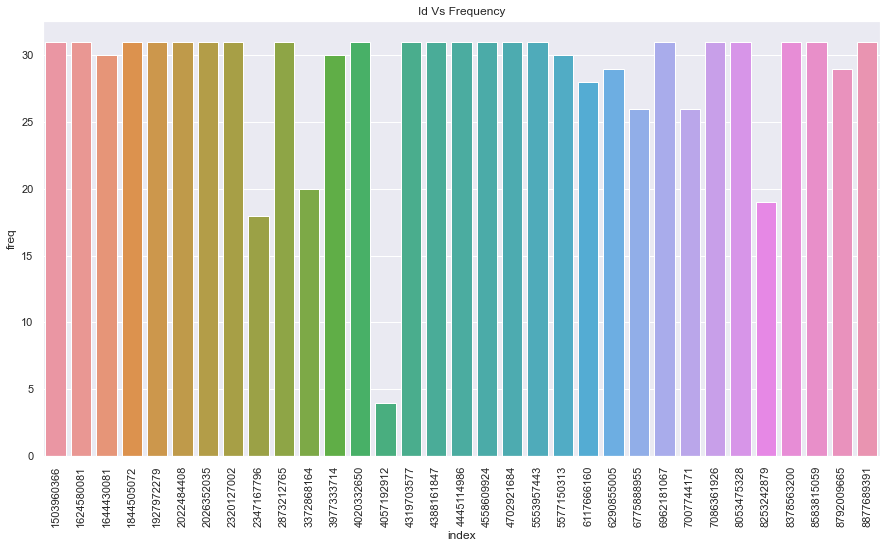

In [65]:
id_detail = sns.barplot(x = 'index',y='freq',data = Id_freq)
id_detail.set_title("Id Vs Frequency")
plt.xticks(rotation=90)
plt.show()

###### OBSERVATION: It seems like 12 users were not consistent with their walk rountine and rest all continued for 31 days. Id's like 4057192912 walked for just 4 days and similarily 3977333714  , 1644430081, 5577150313 walked for 30 days and so on.
###### The reason of 33 Id's for not continuing could be anything maybe their mobile tracking application got disconnected with Smart watch or else they voluntarily stopped using, it could be anything. 
###### Let's move forward and look for more such insignts.

# Creating new column named 'TotalMinutes'.

###### There is a column named Total distance and also there is a bifurcation of total distance available in the data. But there is no total minutes column for all bifurcated minutes. So lets create a new column for it for further analysis.

In [66]:
data.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')

In [67]:
data['TotalActiveMinutes'] = data['VeryActiveMinutes']+ data['FairlyActiveMinutes']+data['LightlyActiveMinutes']

##### TIP: Not including the sedentary minutes in my total minutes because I want to calculate the minutes which are actually utilised for walking only and not for any other inactive stuff.

In [68]:
data.tail(5)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalActiveMinutes
935,8877689391,2016-05-08,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847,266
936,8877689391,2016-05-09,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710,309
937,8877689391,2016-05-10,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832,253
938,8877689391,2016-05-11,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832,313
939,8877689391,2016-05-12,8064,6.120000,6.120000,0.0,1.82,0.04,4.25,0.00,23,1,137,770,1849,161


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

###### Properly recorded the datatype for new column.

# Checking for description of data:
###### For our basic understanding of data.

In [70]:
data.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalActiveMinutes
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574,227.542553
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862,121.776307
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000,146.750000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000,247.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000,317.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000,552.000000


###### OBSERVATION: From the above description table, we can say that the average total steps is around 7600, maximum total steps in the data for a Id is 36019.
###### On an average the more active distances is 1.502681 and max goes like 21.920. So such infos will help as an answers for quick small questions like max, min or an avg or 1st quartile and such stuff.

# Checking for the Start and End date in the available data:

In [71]:
min(data['ActivityDate'])

Timestamp('2016-04-12 00:00:00')

In [72]:
max(data['ActivityDate'])

Timestamp('2016-05-12 00:00:00')

##### So from min and max we can say that the start date is 12th April 2016 and end date is 12th May 2016 which is 31 unique dates.

# Creating new columns for Days and Days of week in a number:

###### In this, I also want to show the days for the available dates and days of week(which day is it monday=0, tuesday =1 and so on.

In [73]:
data['Days'] = data['ActivityDate'].dt.day_name()

In [74]:
data['Daysofweek'] = data['ActivityDate'].dt.dayofweek

In [75]:
data.head(5)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalActiveMinutes,Days,Daysofweek
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,366,Tuesday,1
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,257,Wednesday,2
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,222,Thursday,3
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,272,Friday,4
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,267,Saturday,5


###### So now we got all columns ready and perfect to start our analyses. Lets go and find some useful insights and patterns.

# Start: Correlation.

###### Firstly knowing the correlation among all fields will be of great help.

In [76]:
data.corr()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalActiveMinutes,Daysofweek
Id,1.000000,0.185721,0.241000,0.238816,0.188015,0.308691,0.026665,0.019629,-0.015698,0.303608,0.051158,-0.098754,-0.043319,0.396671,0.001749,0.004339
TotalSteps,0.185721,1.000000,0.985369,0.984822,0.181849,0.740115,0.507105,0.692208,0.070505,0.667079,0.498693,0.569600,-0.327484,0.591568,0.772429,-0.036614
TotalDistance,0.241000,0.985369,1.000000,0.999505,0.188332,0.794582,0.470758,0.662002,0.082389,0.681297,0.462899,0.516300,-0.288094,0.644962,0.722605,-0.031672
TrackerDistance,0.238816,0.984822,0.999505,1.000000,0.162585,0.794338,0.470277,0.661365,0.074591,0.680816,0.463154,0.514713,-0.289343,0.645313,0.721094,-0.029606
LoggedActivitiesDistance,0.188015,0.181849,0.188332,0.162585,1.000000,0.150852,0.076527,0.138302,0.154996,0.234443,0.053860,0.102135,-0.046999,0.207595,0.163639,-0.120062
VeryActiveDistance,0.308691,0.740115,0.794582,0.794338,0.150852,1.000000,0.192986,0.157669,0.046117,0.826681,0.211730,0.059845,-0.061754,0.491959,0.311372,-0.018901
ModeratelyActiveDistance,0.026665,0.507105,0.470758,0.470277,0.076527,0.192986,1.000000,0.237847,0.005793,0.225464,0.946934,0.162092,-0.221436,0.216790,0.361552,0.016593
LightActiveDistance,0.019629,0.692208,0.662002,0.661365,0.138302,0.157669,0.237847,1.000000,0.099503,0.154966,0.220129,0.885697,-0.413552,0.466917,0.871971,-0.029693
SedentaryActiveDistance,-0.015698,0.070505,0.082389,0.074591,0.154996,0.046117,0.005793,0.099503,1.000000,0.008258,-0.022361,0.124185,0.035475,0.043652,0.109891,-0.053461
VeryActiveMinutes,0.303608,0.667079,0.681297,0.680816,0.234443,0.826681,0.225464,0.154966,0.008258,1.000000,0.312420,0.051926,-0.164671,0.615838,0.367545,-0.026163


# Visualization: Heatmap:

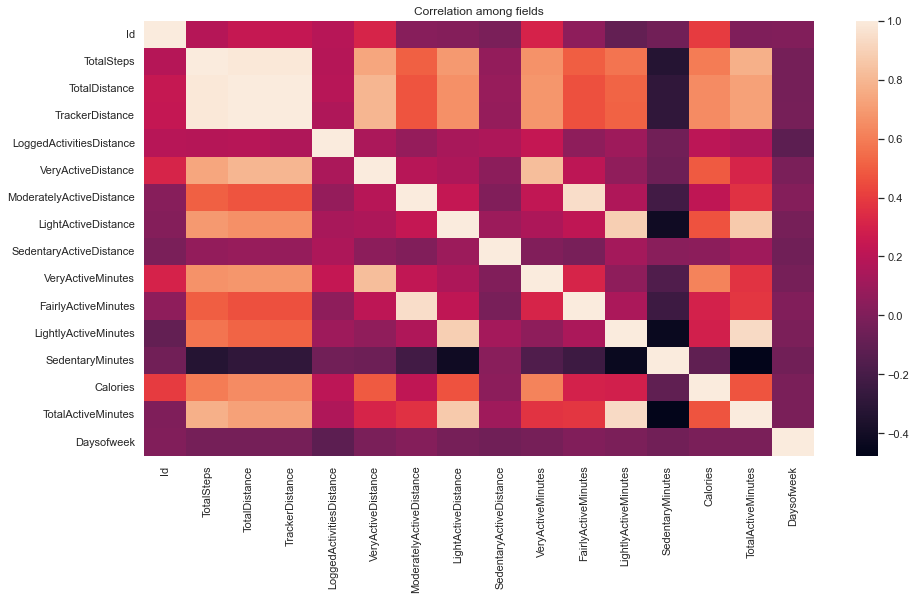

In [77]:
heatmap = sns.heatmap(data.corr())
heatmap.set_title('Correlation among fields')
plt.show()

###### OBSERVATION: There is a strong positive linear relationship between total steps vs total distance, slighty positive between total step and total minutes/calories.
###### There is negative relationship among sedentary distance vs total steps/total distance/lightlyactiveminutes
###### And also sedentary minutes and total minutes are in negative relationsip because the more active minutes, the lesser inactive minutes.

# Let's visualize this relationship in details:


# Visualization: Scatterplot: 
###### correlation comparison between calories and totalsteps.

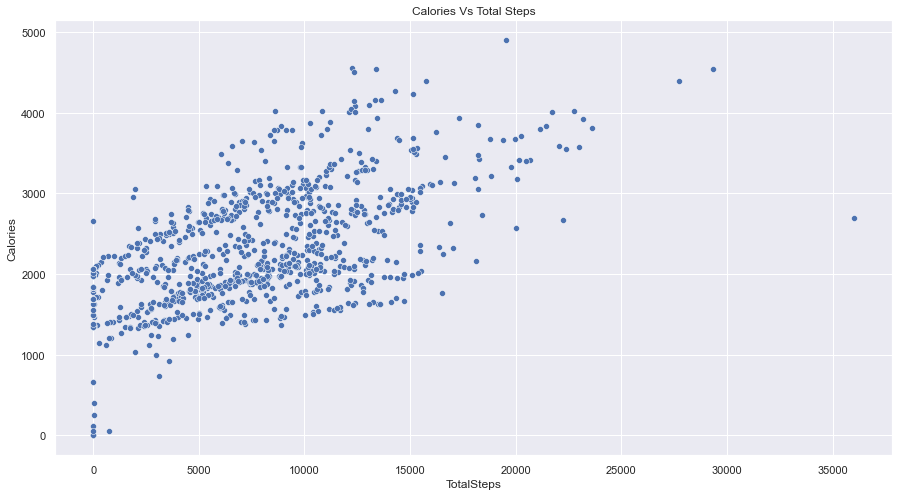

In [78]:
scatter_one = sns.scatterplot(x='TotalSteps',y ='Calories',data=data)
scatter_one.set_title('Calories Vs Total Steps')
plt.show()

##### OBSERVATION: Through this scatterplot, we can say that total steps and calories are having a linear relationship which is strongly positive. As one of them tends to inscrease with the other one in same increasing manner.

# Visualization: Scatterplot: 
###### sedentary minutes vs total active minutes

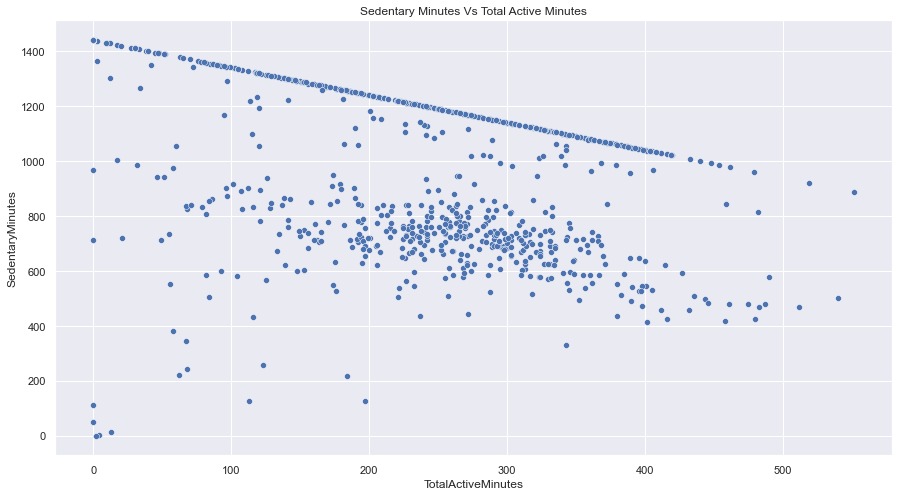

In [79]:
scatter_two = sns.scatterplot(x='TotalActiveMinutes',y ='SedentaryMinutes',data=data)
scatter_two.set_title('Sedentary Minutes Vs Total Active Minutes')
plt.show()

###### OBSERVATION:  It is quite clear from the above plot that the lesser the total active minutes, the more sedentary minutes. As we can see when total minutes was ranging between 0-100, then sedentary minutes were on its peak around 1400 minutes.

### Suggestion: Win-Win situation for both company and user.:
###### It is not okay to have such peak sedenary minutes for a person like a person is recommended to move to have a healthy body. So here, app must suggest the recommendation/notification about the facts where it will show how a healthy body helps a healthy mind and being inactive for so many hours will adversely affect a body, so one must wake up and try to be active. Which in turn they will atleast use the mobile tracker and watch will be win-win situation for both company and user.
###### 

# Creating a new data variable:

###### As we are going to convert the datatypes of Days and Daysofweek column into Category column.

In [80]:
dt = data.astype({"Daysofweek":'category',"Days":'category'})
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

# GROUP BY on ActivityDate column:
###### Grouping the data and getting the mean so that we compare total steps on datewise with proper intervals on an average.

In [81]:
dt1 = dt.groupby(by='ActivityDate').sum()
dt1

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalActiveMinutes
ActivityDate,,,,,,,,,,,,,,,
2016-04-12,160287631905,271816,197.429999,196.619999,7.122864,60.270000,11.42,112.530000,0.01,736,259,6567,33865,78893,7562
2016-04-13,160287631905,237558,168.409999,167.360000,6.943454,43.780000,13.86,103.650000,0.05,671,349,5998,33719,75459,7018
2016-04-14,160287631905,255538,184.780001,184.020001,5.538496,49.820000,16.82,117.760000,0.07,691,409,6633,33331,77761,7733
2016-04-15,160287631905,248617,174.500000,174.500000,0.000000,34.840000,13.33,124.320000,0.05,633,326,7057,31715,77721,8016
2016-04-16,156230438993,277733,201.330001,201.330001,0.000000,63.799999,22.68,110.420000,0.05,891,484,6202,32085,76574,7577
2016-04-17,156230438993,205096,145.299999,145.299999,0.000000,36.649999,15.92,90.310000,0.02,605,379,5291,33599,71391,6275
2016-04-18,156230438993,252703,181.049999,179.980000,7.022697,53.300001,22.27,105.000000,0.05,781,516,6025,33959,74668,7322
2016-04-19,156230438993,257557,187.899998,186.919998,7.195223,60.260000,16.61,110.830000,0.03,767,441,6461,32126,75491,7669
2016-04-20,156230438993,261215,190.410001,189.510001,7.016988,59.580000,20.27,110.430001,0.06,774,600,6515,31172,76647,7889


# Visualization: Line Graph:

###### Dates vs Total Steps:

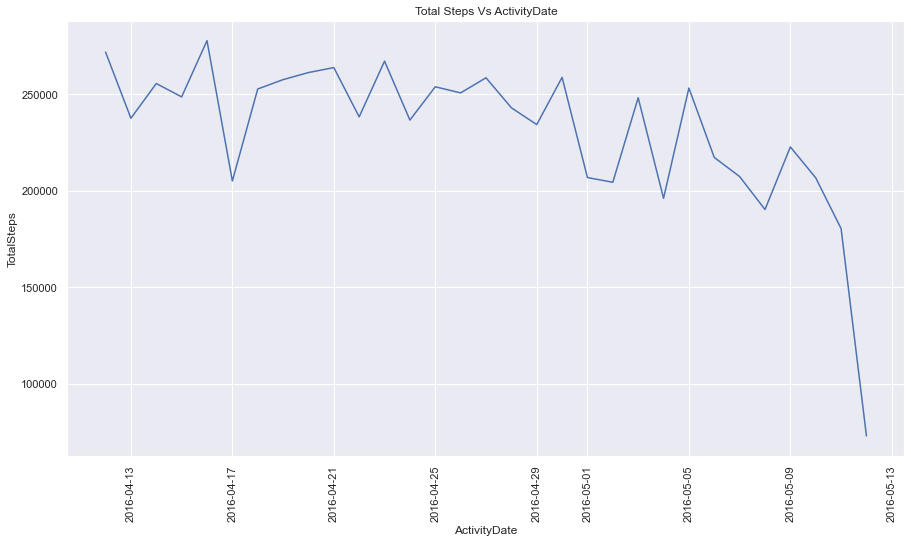

In [82]:
first = sns.lineplot(x = 'ActivityDate', y = 'TotalSteps',data = dt1)
plt.xticks(rotation=90)
first.set_title('Total Steps Vs ActivityDate')
plt.show()

###### OBSERVATION: By the end of month the average total steps seems declining. Like in the start of the month people preferred walking but the same got descreasing as the time passed.

### SUGGESTION: So here we can enourage the users by notifications or remainders from start or whenever they start missing the routine. Remainders like how zomato and duolingo apps notifies their users once the users start going off track. for notification, we can remind them though mobile app through which they track their performances.

# Creating a new data variable and assigning few columns to it:

In [83]:
days = data[['Daysofweek','Days','TotalSteps','Calories','TotalActiveMinutes']]
days

,Daysofweek,Days,TotalSteps,Calories,TotalActiveMinutes
0,1,Tuesday,13162,1985,366
1,2,Wednesday,10735,1797,257
2,3,Thursday,10460,1776,222
3,4,Friday,9762,1745,272
4,5,Saturday,12669,1863,267
...,...,...,...,...,...
935,6,Sunday,10686,2847,266
936,0,Monday,20226,3710,309
937,1,Tuesday,10733,2832,253
938,2,Wednesday,21420,3832,313


# GROUP BY on Days columns with Mean aggregation:

In [84]:
days = days.groupby(by='Days').mean().sort_values('Daysofweek')
days

,Daysofweek,TotalSteps,Calories,TotalActiveMinutes
Days,,,,
Monday,0.0,7780.866667,2324.208333,229.166667
Tuesday,1.0,8125.006579,2356.013158,234.631579
Wednesday,2.0,7559.373333,2302.620000,223.733333
Thursday,3.0,7405.836735,2199.571429,216.789116
Friday,4.0,7448.230159,2331.785714,236.365079
Saturday,5.0,8152.975806,2354.967742,244.266129
Sunday,6.0,6933.231405,2263.000000,208.487603


# Visualization: Line Chart:
###### Total active minutes vs days

Text(0.5, 1.0, 'Total Active Minutes Vs Days')

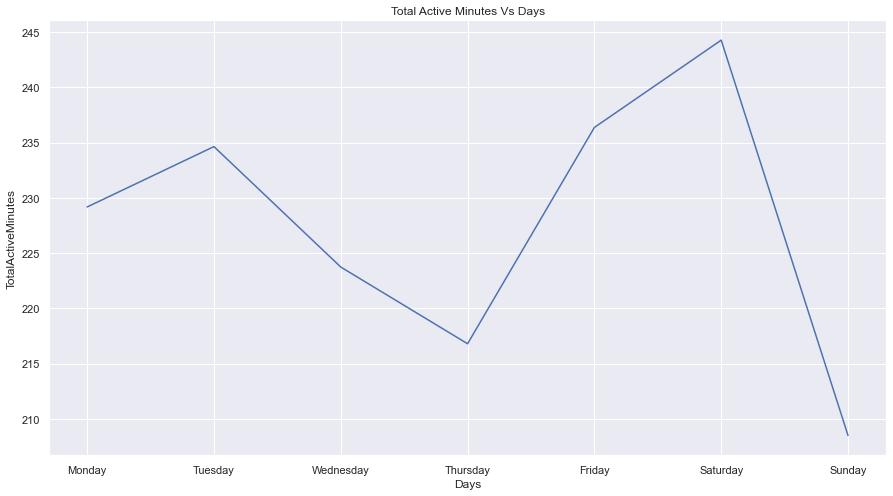

In [85]:
line = sns.lineplot(x = 'Days',y = 'TotalActiveMinutes',data = days)
line.set_title('Total Active Minutes Vs Days')

###### OBSERVATION: The number of total active minutes are in upward from fridays to saturday, well there is little uplift from monday to tuesday but then it goes to downward slopping as wednesday and thursday arrives.
###### In the above graph, we can clearly see that people preferring walk on days like saturdays and tuesdays. From mondays to tuesdays there is growth then slight decrement in the total steps from wednesdays to fridays then again on saturday the number of total steps is on its peak.
###### The total steps number is at its lowest on sundays.

# Visualization: Piechart
###### Days vs Steps
# Checkout the pie chart in Anti-Clockwise.

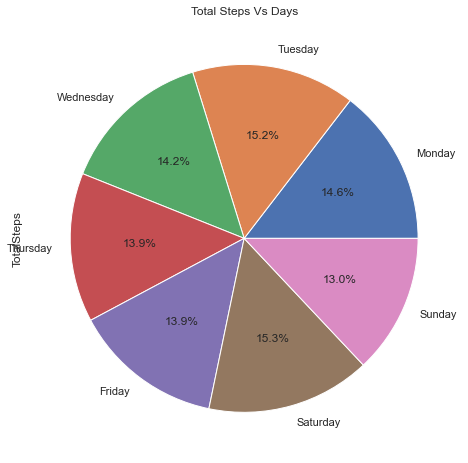

In [86]:
pie = days.plot(kind = 'pie',y = 'TotalSteps',autopct='%.1f%%',legend=None)
pie.set_title('Total Steps Vs Days')
plt.show()

###### OBSERVATION: Above pie chart clearly explains that people are not preferring walk on sundays. The reason could be anything like because they want to spend sundays resting on coach,etc.

###### People are more likely to walk on tuesday as compared to any other day and it is continued till friday and again their is peak for saturday as well.

# Creating new data variable for different data:
###### Here, I excusively want to work on minutes which is why I'm creating a whole new dataframe named 'Minutes'.

In [87]:
minutes = data[['Days','VeryActiveMinutes','FairlyActiveMinutes','LightlyActiveMinutes']]

In [88]:
minutes

,Days,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes
0,Tuesday,25,13,328
1,Wednesday,21,19,217
2,Thursday,30,11,181
3,Friday,29,34,209
4,Saturday,36,10,221
...,...,...,...,...
935,Sunday,17,4,245
936,Monday,73,19,217
937,Tuesday,18,11,224
938,Wednesday,88,12,213


# GROUP BY on days with sum aggregation:

In [89]:
minutes = minutes.groupby(by='Days').sum()
minutes

,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes
Days,,,
Friday,2527,1526,25729
Monday,2773,1680,23047
Saturday,2718,1885,25686
Sunday,2418,1758,21051
Thursday,2853,1758,27257
Tuesday,3489,2179,29996
Wednesday,3117,1965,28478


# Visualization: Stacked Bar chart:

Text(0.5, 1.0, 'Days Vs Active Minutes')

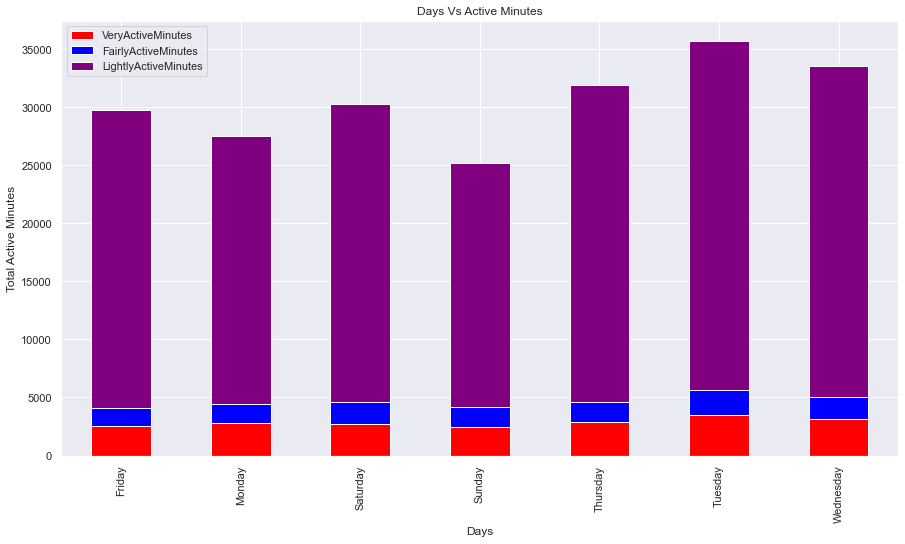

In [90]:
stacked = minutes.plot(kind='bar',stacked=True,color=['red','blue','purple','orange'])
plt.xlabel('Days')
plt.ylabel('Total Active Minutes')
plt.title('Days Vs Active Minutes')

###### OBSERVATION: Lightly active minutes are 10x higher than very active and fairly minutes.

# FINAL OBSERVATION: 
###### It is clear that as the time passes, people aren't preferring to walk. So brand should come up with some notification/reminder for users on their smart watch or through mobile app, that will surely boost the interest for walking. 
###### Notifications/Reminders like appreciating for last task and encourging them to continue the phase with littel activity atleast for minimum of 10-15 minutes for health and likewise.

# THANK YOU.